# K-means clustering for data embedded in $\mathbb{R}^2$

In [529]:
import numpy as np
from matplotlib import pyplot as plt

'Roughly' generates two clusters, one in the bottom left and one in the top right. The parameter $N$ controls how much overlap there is between the two clusters. Higher $N \Rightarrow$ less overlap.

In [536]:
N = 6
n = 20

In [537]:
cluster1 = np.array([[np.random.random(), np.random.random()] for _ in range(n)])
cluster2 = np.array([[(1-N*np.random.random())/N, (1-N*np.random.random())/N] for _ in range(n)])

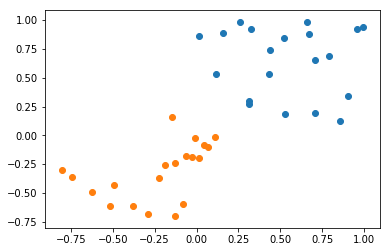

In [538]:
plt.scatter(cluster1[:,0], cluster1[:,1])
plt.scatter(cluster2[:,0], cluster2[:,1])
plt.show()

The above scatterplot shows the clusters we aim to recover using $k$-means clustering. Now we implement the algorithm with $k=2$. (I could modify this later to accept more clusters.)

In [539]:
k = 2

In [540]:
#Randomly chosen centroids
centroid1 = cluster1[np.random.choice(range(n))]
centroid2 = cluster2[np.random.choice(range(n))]

In [541]:
#Forget all the clusters and concatenate all data points into one matrix.
all_points = np.row_stack((cluster1, cluster2))

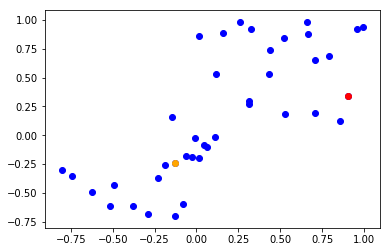

In [542]:
plt.scatter(all_points[:,0], all_points[:,1], color = 'blue')

plt.scatter(centroid1[0], centroid1[1], color = 'red')
plt.scatter(centroid2[0], centroid2[1], color = 'orange')

plt.show()

The above scatterplot shows the randomly selected centroids and the rest of the -now unclustered- data points. Next we calculate the distances between the centroids and all other points. Assign each point to the cluster defined by the centroid the point is closest to.

In [543]:
#Euclidian Distance - 2D
def distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[0] - p2[1])**2)

In [544]:
#List of tuples (d1, d2) where d, & d2 are the distances to centroid1 & centroid 2 respectively
distances = [(distance(centroid1, all_points[n]), distance(centroid2, all_points[n])) for n in range(len(all_points))]

In [545]:
guess_cluster_1 = []
guess_cluster_2 = []

for each_distance in distances:
    if (each_distance.index(min(each_distance))) == 0:
        guess_cluster_1.append(all_points[distances.index(each_distance)])
    else:
        guess_cluster_2.append(all_points[distances.index(each_distance)])
        
guess_cluster_1 = np.asarray(guess_cluster_1)
guess_cluster_2 = np.asarray(guess_cluster_2)

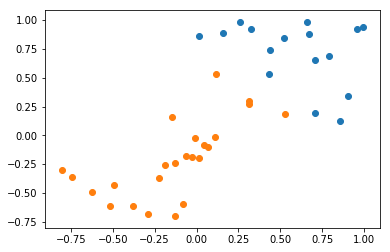

In [546]:
plt.scatter(guess_cluster_1[:,0], guess_cluster_1[:,1])
plt.scatter(guess_cluster_2[:,0], guess_cluster_2[:,1])
plt.show()

Now calculate the new centroids of clusters 1 & 2 as the component-wise, arithmetic mean of all elements in clusters 1 & 2 respectively.

In [547]:
centroid1 = [sum(guess_cluster_1[:,0])/len(guess_cluster_1[:,0]), sum(guess_cluster_1[:,1])/len(guess_cluster_1[:,1])]
centroid2 = [sum(guess_cluster_2[:,0])/len(guess_cluster_2[:,0]), sum(guess_cluster_2[:,1])/len(guess_cluster_2[:,1])]

Repeat the process until clusters remain stable.

In [548]:
def iterate(cluster1_current_estimate, cluster2_current_estimate):
    #Calculate new centroids
    centroid1 = [sum(cluster1_current_estimate[:,0])/len(cluster1_current_estimate[:,0]), sum(cluster1_current_estimate[:,1])/len(cluster1_current_estimate[:,1])]
    centroid2 = [sum(cluster2_current_estimate[:,0])/len(cluster2_current_estimate[:,0]), sum(cluster2_current_estimate[:,1])/len(cluster2_current_estimate[:,1])]
    
    #Stack current data estimates & calculate distances
    all_points = np.row_stack((cluster1_current_estimate, cluster2_current_estimate))
    distances = [(distance(centroid1, all_points[n]), distance(centroid2, all_points[n])) for n in range(len(all_points))]
    
    #Iterate over the distances and re-assign each point to cluster group 1 or 2
    guess_cluster_1 = []
    guess_cluster_2 = []

    for each_distance in distances:
        if (each_distance.index(min(each_distance))) == 0:
            guess_cluster_1.append(all_points[distances.index(each_distance)])
        else:
            guess_cluster_2.append(all_points[distances.index(each_distance)])
        
    guess_cluster_1 = np.asarray(guess_cluster_1)
    guess_cluster_2 = np.asarray(guess_cluster_2)
    
    plt.scatter(guess_cluster_1[:,0], guess_cluster_1[:,1])
    plt.scatter(guess_cluster_2[:,0], guess_cluster_2[:,1])
    plt.show()

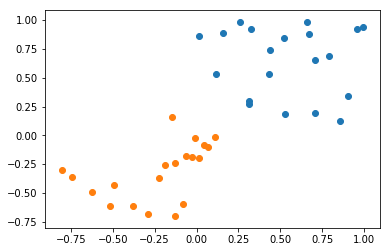

In [549]:
iterate(guess_cluster_1, guess_cluster_2)

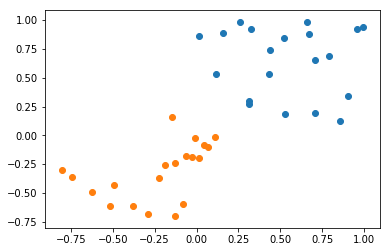

In [550]:
iterate(guess_cluster_1, guess_cluster_2)